**handson用資料としての注意点**

普通、同じセル上で何度も試行錯誤するので、最終的に上手くいったセルしか残らず、失敗したセルは残りませんし、わざわざ残しません。

今回はhandson用に 試行・思考過程を残したいと思い、エラーやミスが出ても下のセルに進んで処理を実行するようにしています。

notebookのセル単位の実行ができるからこそのやり方かもしれません。良い。

（下のセルから文は常体で書きます。）

kunai (@jdgthjdg)

---


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import numpy as np
import qgrid
#設定でDataFrameなどが長く表示されないようにします（画面領域の消費を抑えてhandsonをしやすくするため）
# 長い場合の途中の省略表示(...)を出す閾値の設定（折り返しとは無関係）
pd.set_option('max_rows',10)
pd.set_option('max_columns',20) # これを超えたら全部は表示しない。 A B C ... X Y Z のように途中を省く。

In [2]:
kafun = pd.read_pickle("kafun04.pkl")
kafun.head()

,彦根市役所,滋賀県琵琶湖・環境科学研究センター,京都府立医科大学,京都府中丹東保健所,京都市右京区役所京北合同庁舎,豊中市役所第一庁舎,兵庫県立健康環境科学研究センター,兵庫県篠山庁舎,奈良県吉野保健所,和歌山地方気象台,和歌山県西牟婁振興局庁舎
date_hour,,,,,,,,,,,
2008-02-01 00:00:00,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-02-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,8.0,0.0
2008-02-01 02:00:00,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
2008-02-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,8.0,0.0
2008-02-01 04:00:00,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## qgrid が便利

In [3]:
qgrid.show_grid(kafun)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

---

## dfを感じる

In [4]:
kafun.describe()

,彦根市役所,滋賀県琵琶湖・環境科学研究センター,京都府立医科大学,京都府中丹東保健所,京都市右京区役所京北合同庁舎,豊中市役所第一庁舎,兵庫県立健康環境科学研究センター,兵庫県篠山庁舎,奈良県吉野保健所,和歌山地方気象台,和歌山県西牟婁振興局庁舎
count,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000
mean,21.971820,23.674256,36.879367,32.759359,24.156757,16.526382,17.474181,31.065837,54.637757,16.901511,30.988740
std,86.268152,116.133768,112.168052,157.233762,236.653331,56.362931,50.441871,175.805337,511.425320,46.548534,102.259954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,4.000000,0.000000,4.000000,4.000000,0.000000,4.000000,4.000000,8.000000
75%,12.000000,16.000000,32.000000,16.000000,12.000000,16.000000,16.000000,12.000000,20.000000,16.000000,24.000000
max,3312.000000,9290.000000,5239.000000,6100.000000,17753.000000,2435.000000,2185.000000,6629.000000,38236.000000,1406.000000,3251.000000


<br>
<br>
<br>

奈良から強いパワーを感じる

京都も不穏
<br>
<br>


---


## datetime を indexにしておくと便利な機能が多い

- df.loc["2018"]  
- df.loc["2018/04"]  
- df.loc["2013":"2015"]  

In [5]:
kafun.loc["2013":"2015"]

,彦根市役所,滋賀県琵琶湖・環境科学研究センター,京都府立医科大学,京都府中丹東保健所,京都市右京区役所京北合同庁舎,豊中市役所第一庁舎,兵庫県立健康環境科学研究センター,兵庫県篠山庁舎,奈良県吉野保健所,和歌山地方気象台,和歌山県西牟婁振興局庁舎
date_hour,,,,,,,,,,,
2013-02-01 00:00:00,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0
2013-02-01 01:00:00,8.0,0.0,0.0,0.0,0.0,8.0,8.0,8.0,0.0,0.0,0.0
2013-02-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,4.0,0.0
2013-02-01 03:00:00,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
2013-02-01 04:00:00,0.0,0.0,0.0,0.0,0.0,4.0,12.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2015-05-31 19:00:00,8.0,32.0,94.0,57.0,0.0,0.0,8.0,0.0,4.0,24.0,12.0
2015-05-31 20:00:00,8.0,28.0,20.0,12.0,4.0,0.0,8.0,4.0,8.0,41.0,16.0
2015-05-31 21:00:00,8.0,28.0,32.0,4.0,0.0,0.0,12.0,0.0,36.0,28.0,8.0


In [6]:
kafun.loc["2018/03/15 19:00:00":"2018/3/15 21"] # 雑なフォーマットでも気が利く

,彦根市役所,滋賀県琵琶湖・環境科学研究センター,京都府立医科大学,京都府中丹東保健所,京都市右京区役所京北合同庁舎,豊中市役所第一庁舎,兵庫県立健康環境科学研究センター,兵庫県篠山庁舎,奈良県吉野保健所,和歌山地方気象台,和歌山県西牟婁振興局庁舎
date_hour,,,,,,,,,,,
2018-03-15 19:00:00,0.0,4.0,12.0,0.0,32.0,8.0,0.0,57.0,188.0,0.0,0.0
2018-03-15 20:00:00,0.0,8.0,12.0,0.0,45.0,4.0,0.0,41.0,200.0,0.0,0.0
2018-03-15 21:00:00,0.0,12.0,4.0,0.0,73.0,0.0,4.0,41.0,159.0,0.0,4.0


---

# groupby でいろいろな軸から集計してみる
<br>

## 注) : groupby は、pandasにおいてかなり大事な機能だが、
## 解説にはそれなりの時間がかかってしまうため、今回はgroupbyでできることの雰囲気を紹介

---

## 全データを 0-23時の軸で集計( median )

### lambda式を使って、dfの列に無い、オリジナルのgroupを作る

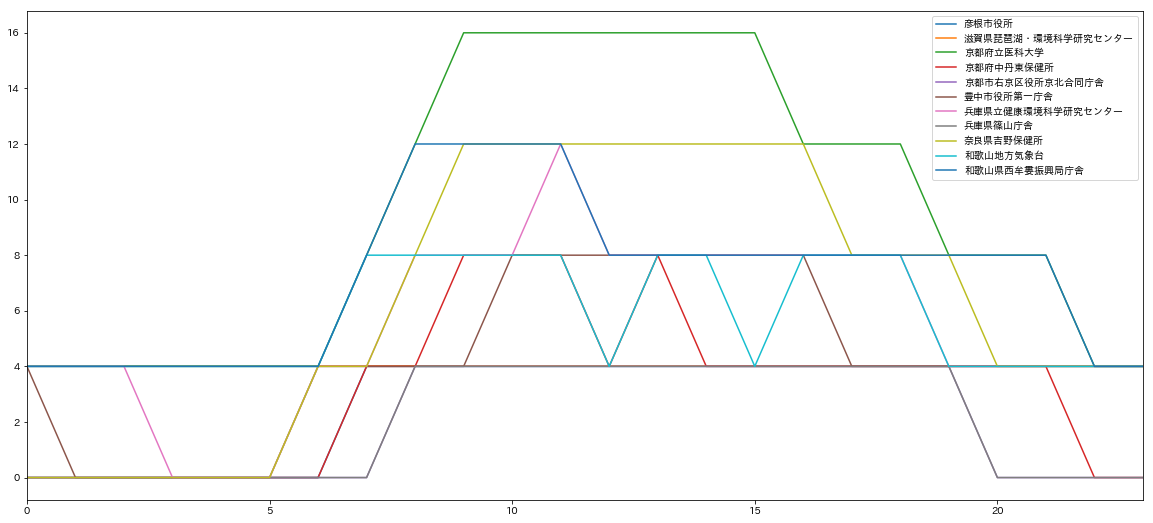

In [7]:
kafun.groupby(lambda x:x.hour).median().plot(figsize=(20,9));

## 全データを年ごとにざっくり集計( median )

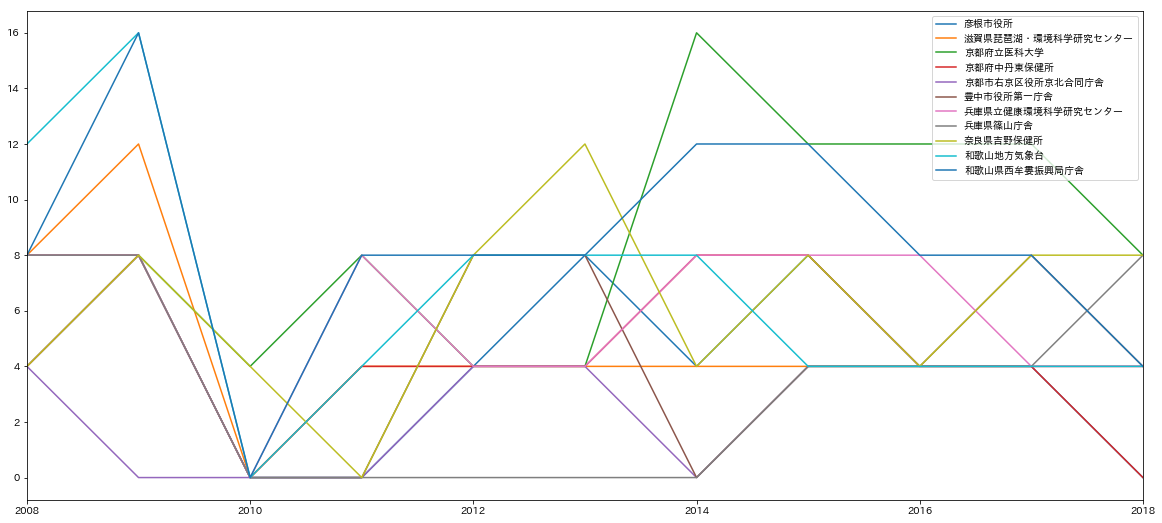

In [8]:
kafun.groupby(lambda x:x.year).median().plot(figsize=(20,9));

## weekofyear（週番号 1-52）や weekday(曜日の数値),weekday_name(曜日名) とかも知ってると便利

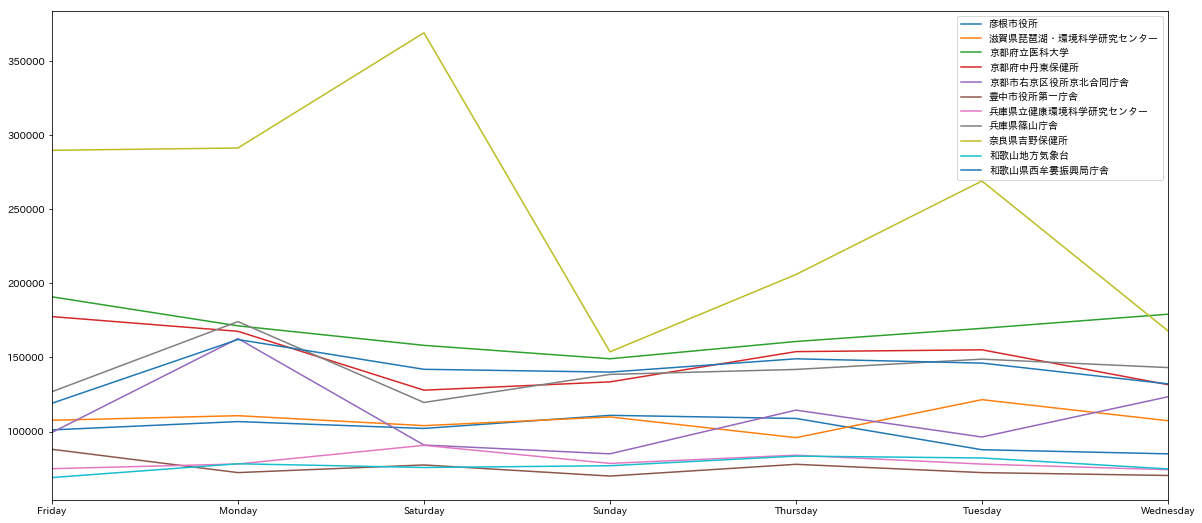

In [9]:
kafun.groupby(lambda x:x.weekday_name).sum().plot(figsize=(20,9), legend=True);

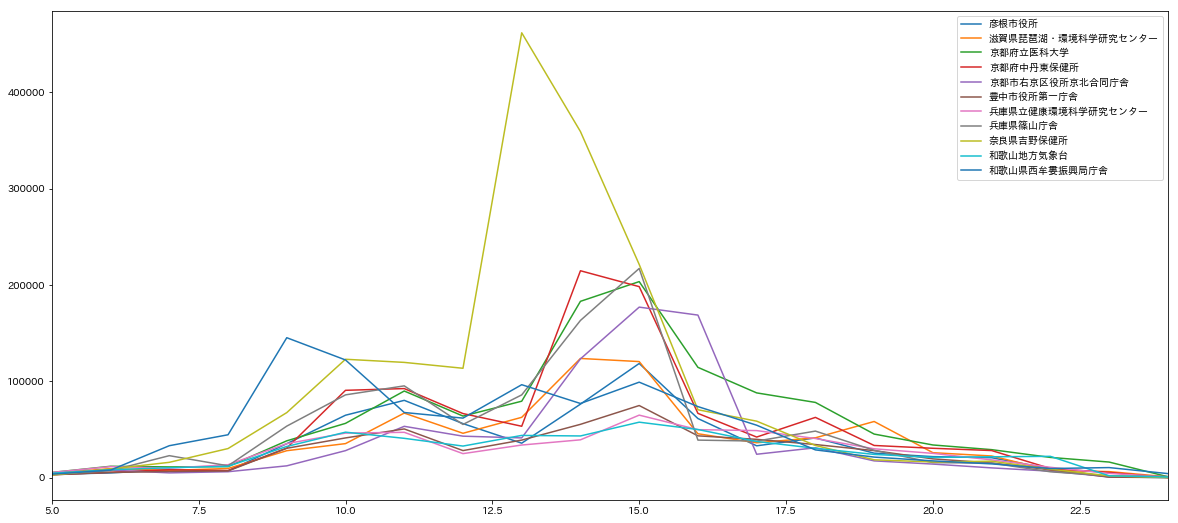

In [10]:
kafun.groupby(lambda x:x.weekofyear).sum().plot(figsize=(20,9), legend=True);

---

# 年と月を含む独自のgroupを作る

2016年4月 → 201604 とか。

### year *100 + month にすれば単純にあらわせる

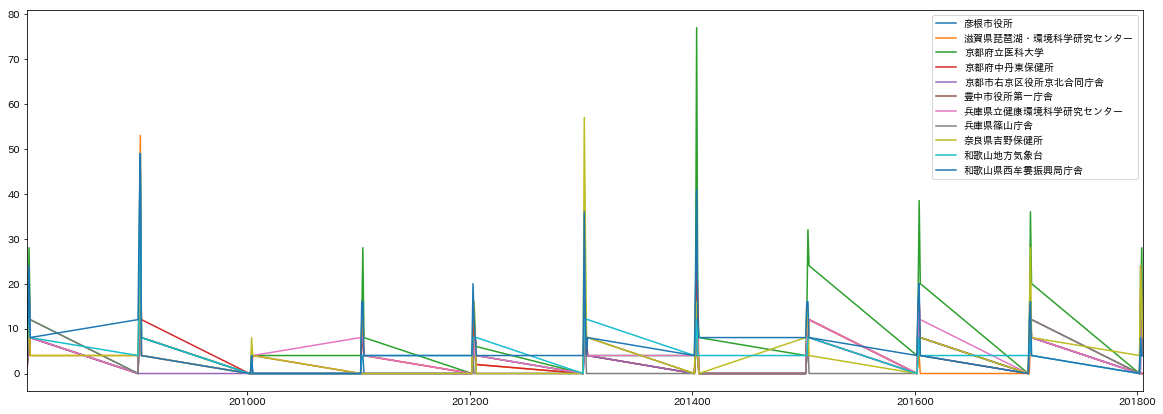

In [11]:
kafun.groupby(lambda x:x.year*100+x.month).median().plot(figsize=(20,7));

### 数値のままだと、途中の多くな空欄になるので上記のようなグラフ
### stringにしてしまうことで、数値のような連続的じゃない、ただのラベルということにする。

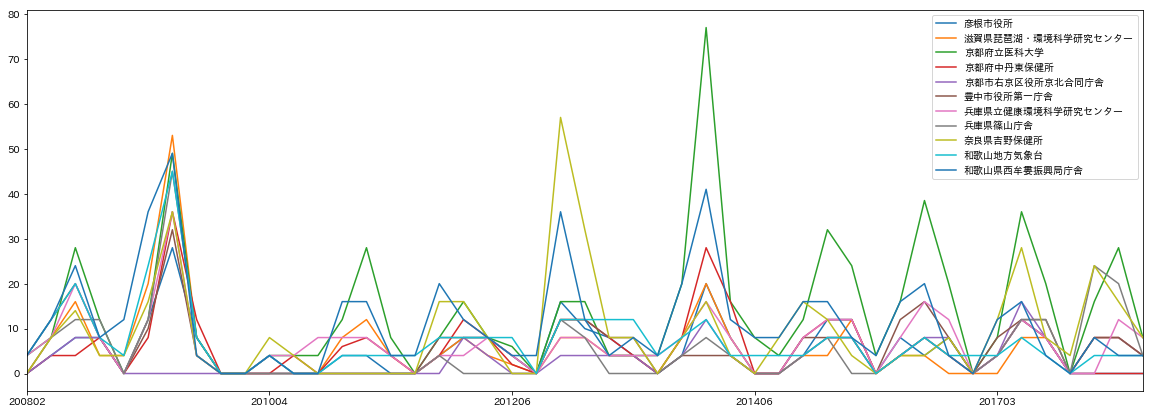

In [12]:
kafun.groupby(lambda x:str(x.year*100+x.month)).median().plot(figsize=(20,7));

---


# 複雑なgroupbyもちょっと紹介

## 各拠点の、毎年3月の 0-23時の分布(平均)を出す。

1. 毎年の3月を抜き出す
1. 0-23時の平均

<br>

### loc[ bool の配列 ] で絞る

In [13]:
march = kafun.loc[kafun.index.month==3]
march

,彦根市役所,滋賀県琵琶湖・環境科学研究センター,京都府立医科大学,京都府中丹東保健所,京都市右京区役所京北合同庁舎,豊中市役所第一庁舎,兵庫県立健康環境科学研究センター,兵庫県篠山庁舎,奈良県吉野保健所,和歌山地方気象台,和歌山県西牟婁振興局庁舎
date_hour,,,,,,,,,,,
2008-03-01 00:00:00,12.0,41.0,12.0,12.0,0.0,90.0,69.0,4.0,4.0,61.0,36.0
2008-03-01 01:00:00,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,53.0,32.0
2008-03-01 02:00:00,0.0,4.0,8.0,0.0,0.0,4.0,16.0,0.0,16.0,36.0,32.0
2008-03-01 03:00:00,0.0,0.0,8.0,0.0,0.0,8.0,8.0,0.0,12.0,20.0,8.0
2008-03-01 04:00:00,4.0,8.0,0.0,4.0,0.0,8.0,24.0,4.0,20.0,28.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
2018-03-31 19:00:00,0.0,0.0,16.0,0.0,12.0,12.0,0.0,45.0,49.0,8.0,61.0
2018-03-31 20:00:00,0.0,28.0,45.0,0.0,12.0,28.0,8.0,36.0,41.0,8.0,20.0
2018-03-31 21:00:00,0.0,20.0,16.0,0.0,8.0,53.0,0.0,102.0,20.0,0.0,0.0



##  query も良い。 

####  \[　\] や　" "　の記述が少なくて簡潔に書けるので楽。
#### 複雑な絞りのパターンであるほど、評価が一回でまとめて行われるため処理としても少し速いとか（docに書いてあった気がするが、うろ覚え・・・）


<br>


In [14]:
march = kafun.query("index.dt.month==3")  # いつもは不要だが、columns みたいに indexにもdtが必要
march

,彦根市役所,滋賀県琵琶湖・環境科学研究センター,京都府立医科大学,京都府中丹東保健所,京都市右京区役所京北合同庁舎,豊中市役所第一庁舎,兵庫県立健康環境科学研究センター,兵庫県篠山庁舎,奈良県吉野保健所,和歌山地方気象台,和歌山県西牟婁振興局庁舎
date_hour,,,,,,,,,,,
2008-03-01 00:00:00,12.0,41.0,12.0,12.0,0.0,90.0,69.0,4.0,4.0,61.0,36.0
2008-03-01 01:00:00,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,53.0,32.0
2008-03-01 02:00:00,0.0,4.0,8.0,0.0,0.0,4.0,16.0,0.0,16.0,36.0,32.0
2008-03-01 03:00:00,0.0,0.0,8.0,0.0,0.0,8.0,8.0,0.0,12.0,20.0,8.0
2008-03-01 04:00:00,4.0,8.0,0.0,4.0,0.0,8.0,24.0,4.0,20.0,28.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
2018-03-31 19:00:00,0.0,0.0,16.0,0.0,12.0,12.0,0.0,45.0,49.0,8.0,61.0
2018-03-31 20:00:00,0.0,28.0,45.0,0.0,12.0,28.0,8.0,36.0,41.0,8.0,20.0
2018-03-31 21:00:00,0.0,20.0,16.0,0.0,8.0,53.0,0.0,102.0,20.0,0.0,0.0


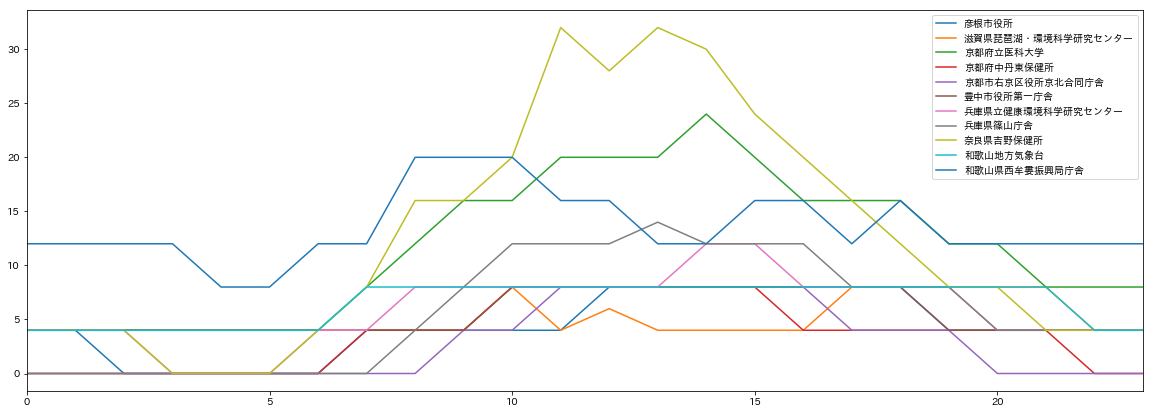

In [15]:
march.groupby(lambda x:x.hour).median().plot(figsize=(20,7));

---

# さらに、年ごとにわけて表示する ( groupby が大好きな人用 )

* gruops
* get_group

を使いこなす

In [16]:
group_year = march.groupby(lambda x:x.year)

.groups で groupby した時の key と 対応する indexが取れる

In [17]:
group_year.groups

{2008: DatetimeIndex(['2008-03-01 00:00:00', '2008-03-01 01:00:00',
                '2008-03-01 02:00:00', '2008-03-01 03:00:00',
                '2008-03-01 04:00:00', '2008-03-01 05:00:00',
                '2008-03-01 06:00:00', '2008-03-01 07:00:00',
                '2008-03-01 08:00:00', '2008-03-01 09:00:00',
                ...
                '2008-03-31 14:00:00', '2008-03-31 15:00:00',
                '2008-03-31 16:00:00', '2008-03-31 17:00:00',
                '2008-03-31 18:00:00', '2008-03-31 19:00:00',
                '2008-03-31 20:00:00', '2008-03-31 21:00:00',
                '2008-03-31 22:00:00', '2008-03-31 23:00:00'],
               dtype='datetime64[ns]', name='date_hour', length=744, freq=None),
 2009: DatetimeIndex(['2009-03-01 00:00:00', '2009-03-01 01:00:00',
                '2009-03-01 02:00:00', '2009-03-01 03:00:00',
                '2009-03-01 04:00:00', '2009-03-01 05:00:00',
                '2009-03-01 06:00:00', '2009-03-01 07:00:00',
                '2

## group名と、get_gropupを使うと 該当のdfが取得できる！

### 小ネタ agg/aggregate なら集計関数をstringで指定できるので、 グラフのtitleと変数を統一できて、あとあとミスりにくい。

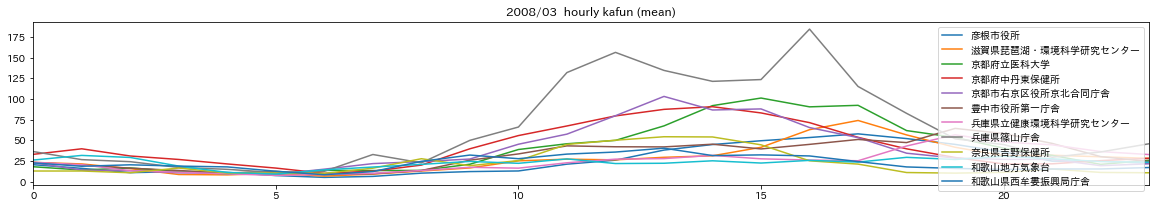

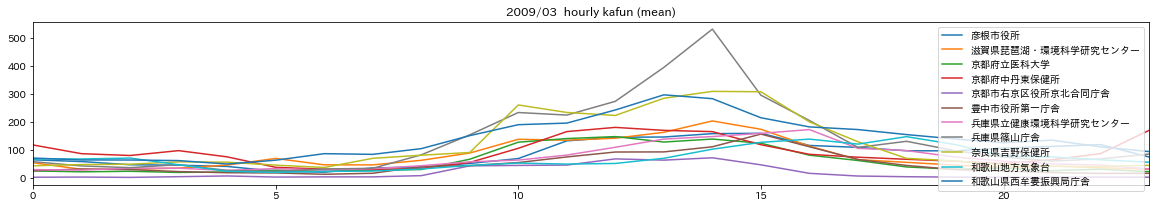

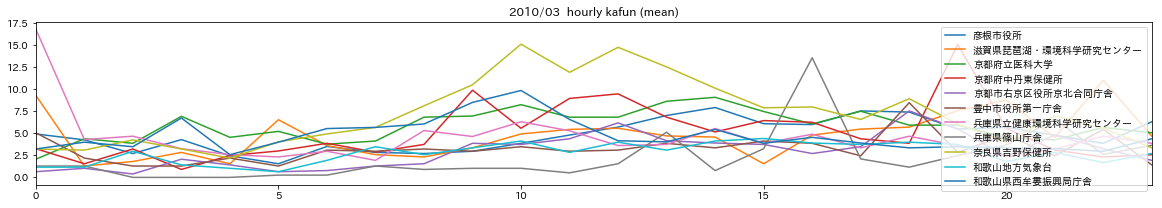

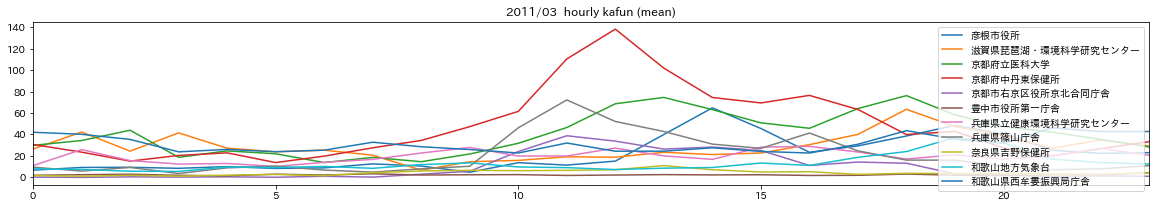

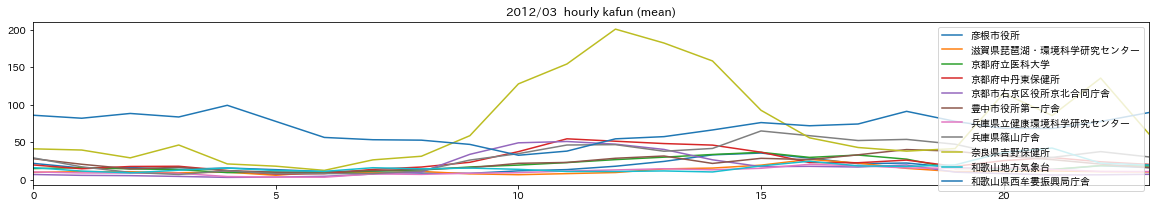

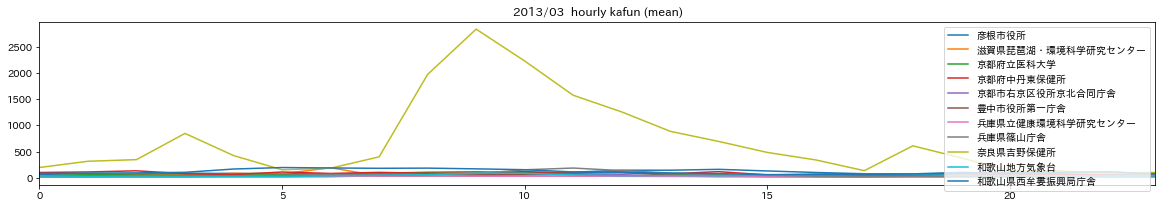

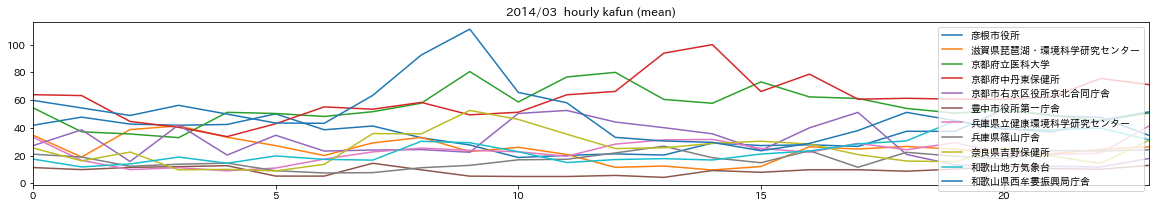

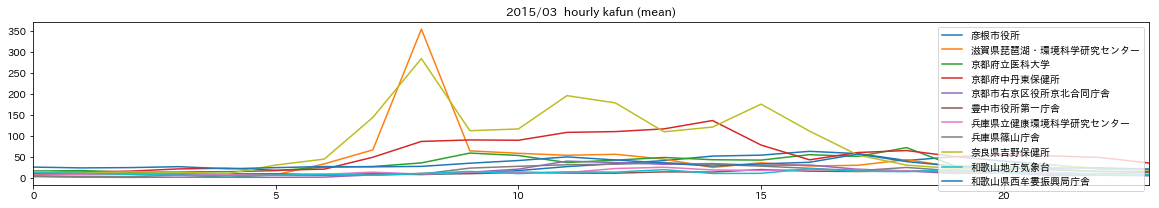

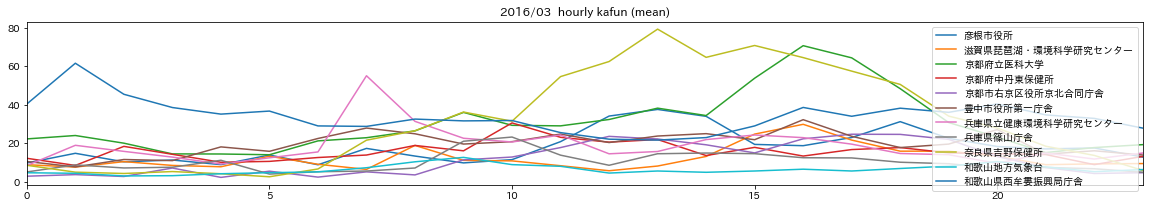

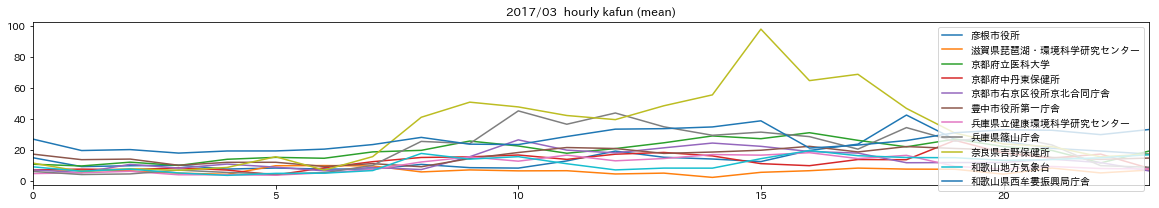

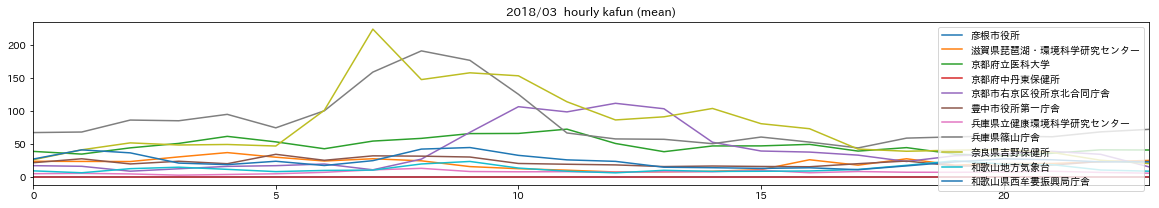

In [18]:
agg_func_name = "mean"
for gr_name, year_kafun_index  in group_year.groups.items():
    #print(gr_name,year_kafun)
    year_kafun = group_year.get_group(gr_name)
    year_kafun.groupby(lambda x:x.hour).agg(agg_func_name).plot(
        figsize=(20,3), 
        title=str(gr_name)+"/03  hourly kafun ("+agg_func_name+")");
    plt.show(); # plot の確定を明示的にした。


---


# 毎 "時"  を   毎 "日"　に落とす down sampling ( hourly -> daily )
### datetime が index である必要がある。

type(df.index) が DatetimeIndex (pandas.core.indexes.datetimes.DatetimeIndex) ならOK 

In [19]:
type(kafun.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [20]:
daily_resampler = kafun.resample("1D") # D, 24h でもOK 
daily_resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

### どんな値を抽出するかの集計の式:  sum, mean, median, first, last, ...

In [21]:
daily_resampler.first() # head(1) みたいなもの、ここでは、0時になる。 逆に last() なら 23時の値

,彦根市役所,滋賀県琵琶湖・環境科学研究センター,京都府立医科大学,京都府中丹東保健所,京都市右京区役所京北合同庁舎,豊中市役所第一庁舎,兵庫県立健康環境科学研究センター,兵庫県篠山庁舎,奈良県吉野保健所,和歌山地方気象台,和歌山県西牟婁振興局庁舎
date_hour,,,,,,,,,,,
2008-02-01,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-02-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2018-05-27,0.0,0.0,16.0,0.0,0.0,4.0,8.0,16.0,4.0,8.0,0.0
2018-05-28,0.0,8.0,4.0,0.0,4.0,28.0,8.0,4.0,8.0,0.0,0.0
2018-05-29,0.0,0.0,8.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,4.0


# 平均で集計

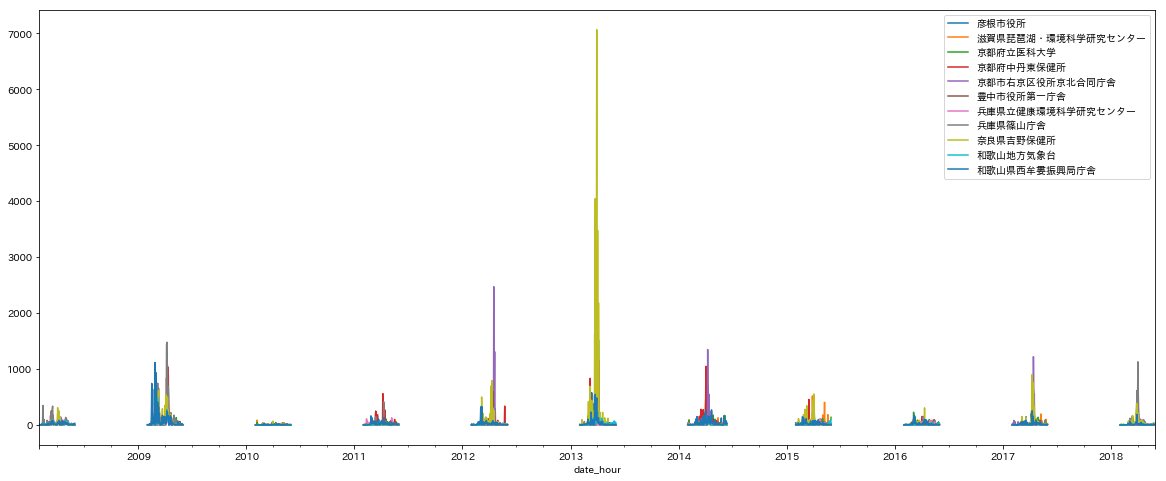

In [22]:
daily_resampler.mean().plot(figsize=(20,8));

<br>
<br>
<br>
<br>
<br>

# 結論：花粉辛い。
### [奈良(吉野保健所)](https://goo.gl/maps/ePz4zeezduR2) はすごい。 （意外に、衛星写真は山だらけでもない。）

<br>
<br>
<br>
<br>

ハンズオン時に、**どっちも盆地だからではないか？** という知見をいただいた。たしかに。。。ぼんちで花粉が溜まりやすいのかもしれない（未調査）。。  
暑い寒いだけでなく、花粉もつらいのであれば、まさに試される盆地（しらんけど）